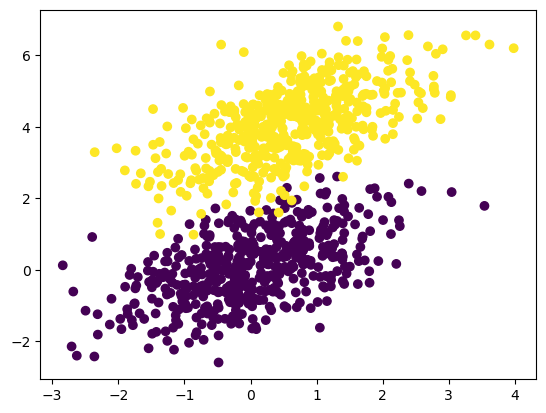

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


np.random.seed(3)
num_pos = 500
 
subset1 = np.random.multivariate_normal([0, 0], [[1, 0.6],[0.6, 1]], num_pos)
subset2 = np.random.multivariate_normal([0.5, 4], [[1, 0.6],[0.6, 1]], num_pos)
 
X = np.vstack((subset1, subset2))
y = np.hstack((np.zeros(num_pos), np.ones(num_pos)))
 
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [2]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [3]:
y_pred = clf.predict(X)

print np.sum(y_pred.reshape(-1,1)==y.reshape(-1,1))*1.0/len(y)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (3618264808.py, line 3)

In [ ]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(y,y_pred)

In [ ]:
#绘制分类边界

def plot_decision_boundary(pred_func, X, y, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid (get class for each grid point)
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # print(Z)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z,alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, alpha=0.8)
    plt.title(title)
    plt.show()
 
 


In [ ]:
plot_decision_boundary(lambda x: clf.predict(x), X, y, "logistic regression prediction")

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def log_likelihood(X, y, theta):
    scores = np.dot(X, theta)
    ll = np.sum(  y * scores - np.log(1 + np.exp(scores)) )
    return ll

In [ ]:
def logistic_regression(X,y,l_rate,iterations,add_intercept = True):
    
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
        
     
    theta = np.zeros(X.shape[1]).reshape(-1,1)
    y=y.reshape(-1,1)
    accu_history = [0] * iterations
    ll_history = [0.0] * iterations
    for epoch in range(iterations):
        x_theta = np.dot(X, theta)
        y_hat = sigmoid(x_theta)
        error = y  - y_hat 
        gradient = np.dot(X.T, error)
        theta = theta + l_rate*gradient
        preds = np.round( y_hat )      
        
        accu = np.sum(preds==y)*1.0/len(y)
        accu_history[epoch]=accu

    
        if( epoch % 100 == 0):
            print("After iter {}; accuracy: {}".format(epoch +1,  accu))
    return theta,accu_history

In [ ]:
theta,accu = logistic_regression(X,y,1,2000)

In [ ]:
accu